## Import Libraries



In [ ]:
!pip install keras==2.13.1
!pip install keras_applications==1.0.8
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.13.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Tensorflow
!pip install tensorflow_addons
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, BatchNormalization, Input, Dense, Flatten, Reshape, Conv1D, Conv1DTranspose, BatchNormalization, Cropping1D
from keras import metrics
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop, Adam, Nadam
import keras

#Sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

#Other
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snNew
import sklearn
import json
import seaborn as snNew
import numpy as np
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import numpy as np
from imblearn.over_sampling import RandomOverSampler

## Loading and Formatting Data

In [ ]:
#Loading Data
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

In [ ]:
X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

In [ ]:
#Label-encode y
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


def one_hot_encoding(y, n_class):
  y_list = []

  for item in y:
    zer = np.zeros(n_class)
    zer[item] = 1
    y_list.append(zer)

  return np.array(y_list)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

#CNN

## Implementing CNN

Epoch 1/1000
6/6 [==============================] - 3s 205ms/step - loss: 0.7310 - accuracy: 0.4618 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 43ms/step - loss: 0.6575 - accuracy: 0.6107 - val_loss: 0.6795 - val_accuracy: 0.5804
Epoch 3/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.6468 - accuracy: 0.6031 - val_loss: 0.6677 - val_accuracy: 0.5893
Epoch 4/1000
6/6 [==============================] - 0s 48ms/step - loss: 0.6295 - accuracy: 0.6412 - val_loss: 0.6469 - val_accuracy: 0.7054
Epoch 5/1000
6/6 [==============================] - 0s 55ms/step - loss: 0.6225 - accuracy: 0.6374 - val_loss: 0.6334 - val_accuracy: 0.6696
Epoch 6/1000
6/6 [==============================] - 0s 50ms/step - loss: 0.6110 - accuracy: 0.6527 - val_loss: 0.6186 - val_accuracy: 0.7411
Epoch 7/1000
6/6 [==============================] - 0s 45ms/step - loss: 0.5988 - accuracy: 0.6603 - val_loss: 0.6089 - val_accuracy: 0.7589
Epoch 8/1000

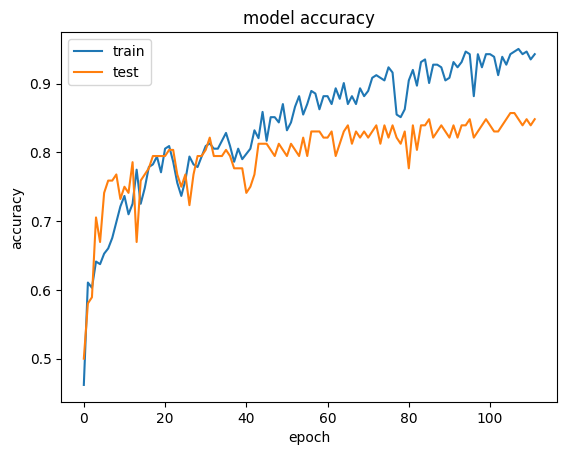

4/4 [==============================] - 0s 5ms/step


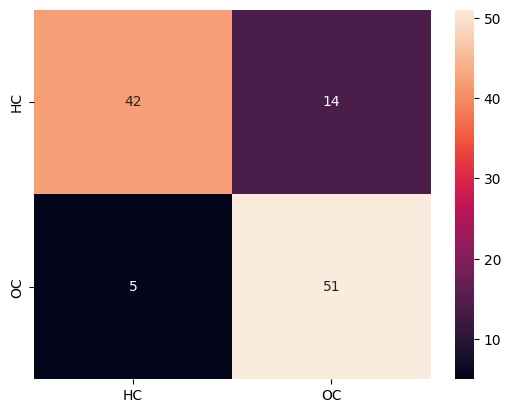

              precision    recall  f1-score   support

           0       0.89      0.75      0.82        56
           1       0.78      0.91      0.84        56

    accuracy                           0.83       112
   macro avg       0.84      0.83      0.83       112
weighted avg       0.84      0.83      0.83       112



In [ ]:
# Neural network
input_tensor = Input(shape=(1267, 1))

x = layers.Conv1D(16, 12, 10, activation='LeakyReLU')(input_tensor)
x = layers.MaxPooling1D(pool_size = 2, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization(momentum=0.80, epsilon=0.001) (x)
x = layers.Flatten()(x)
x = Dense(512, activation='relu')(x)
out = Dense(2, activation='softmax')(x)
cnn_model = keras.Model(inputs=[input_tensor], outputs=[out])
opt = Adam(learning_rate=1E-4, use_ema=True, ema_momentum=0.99)

cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


history = cnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 50,
                        callbacks=[es])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix
y_pred = cnn_model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
plt.show()

print(classification_report(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1))))

##Create CNN Visualizations

In [ ]:
def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model([cnn_model.inputs], [cnn_model.get_layer(layer_name).output, cnn_model.output])
    last_conv_layer_output, preds = grad_model(data)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    return heatmap

#Generating visualizations for test set and appending to heatmap

X_train_vis = train.drop(['y', 'patient'], axis = 1)
y_train_vis = train['y']


layer_name = "conv1d"
label = [0, 1]
heatmap_list = []
heatmaps_dict = {}
i_dict = {}
X_ar = np.array(X_train_vis)
for clas, i in zip(y_train_vis, X_ar):
    data = np.expand_dims(i,0)
    heatmap = grad_cam(layer_name, data)
    heatmap_list.append(heatmap)
    #Create dictionary per class
    if clas in heatmaps_dict.keys():
      heatmaps_dict[clas].append(heatmap)
    else:
      heatmaps_dict[clas] = [heatmap]
    if clas in i_dict.keys():
      i_dict[clas].append(i)
    else:
      i_dict[clas] = [i]

In [ ]:
#Create average heatmap per class
#Average per class]
wave = X_train.columns
w_names = [float(x) for x in wave[:-1]]
average_heatmap = {}
for key, value in heatmaps_dict.items():
  average_heatmap[key] = np.mean(heatmaps_dict[key], axis=0)


total_av = np.mean(list(average_heatmap.values()), axis=0)
average_heatmap['total'] = total_av

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 1480)
y_pos = 1480

#Create dict for current scale values and corresponding Wavelengths
x_axis_dict = { k:v for (k,v) in zip((range(0,1480)), list(X_train.columns))}

#Save total as csv for use in feature selection
heat = pd.DataFrame()
heat['HC'] = [x for x in average_heatmap['HC']][0]
heat['OC'] = [x for x in average_heatmap['OC']][0]
heat['total'] = [x for x in average_heatmap['total']][0]

heat.to_csv('/content/drive/MyDrive/Ovarian_Cancer/CNN_heatmaps.csv')

heat['total'].to_csv('/content/drive/MyDrive/Ovarian_Cancer/total_CNN_heatmaps.csv')

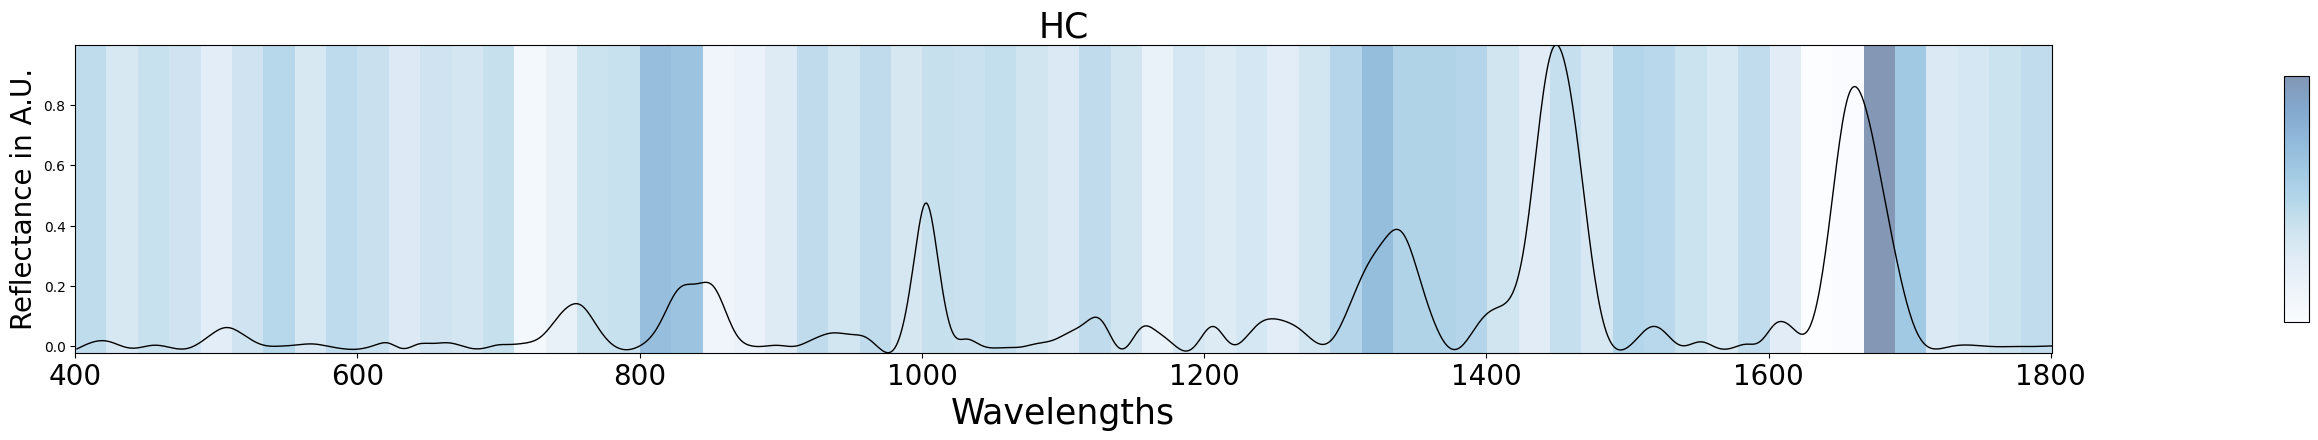

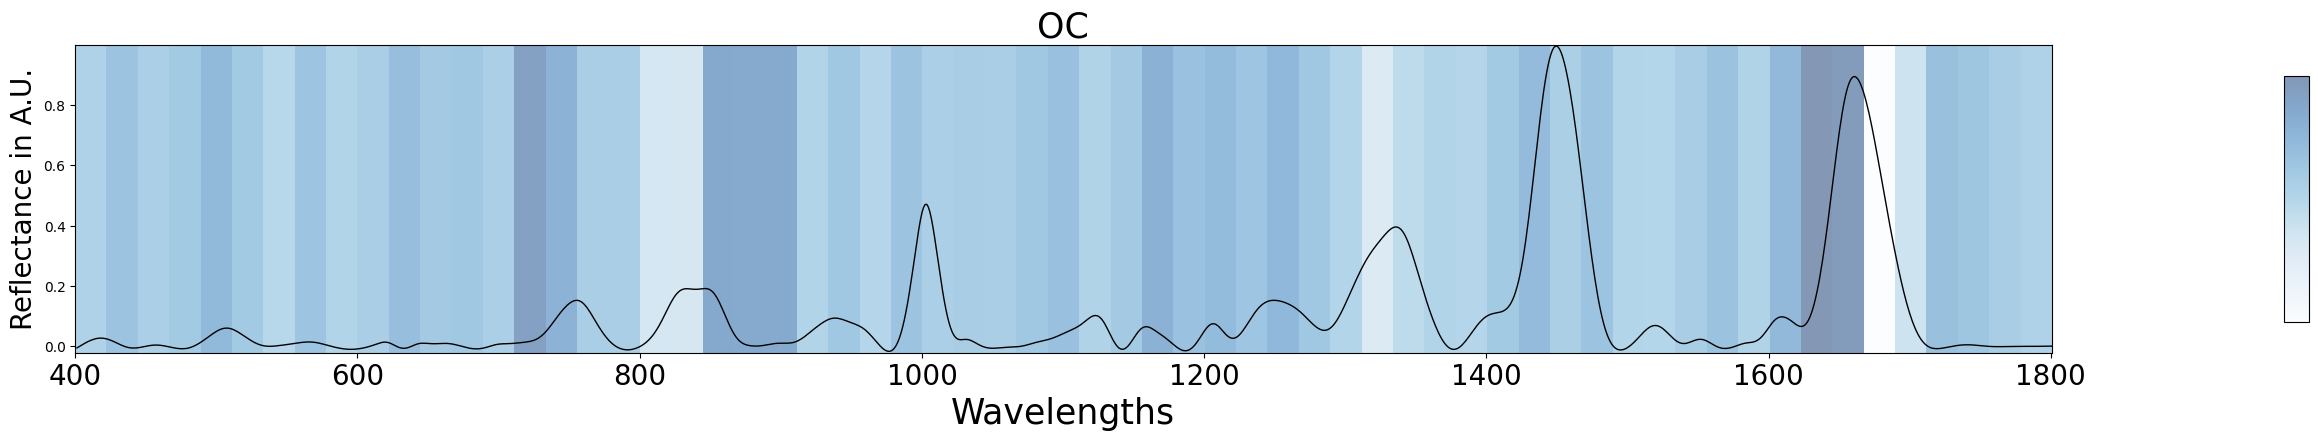

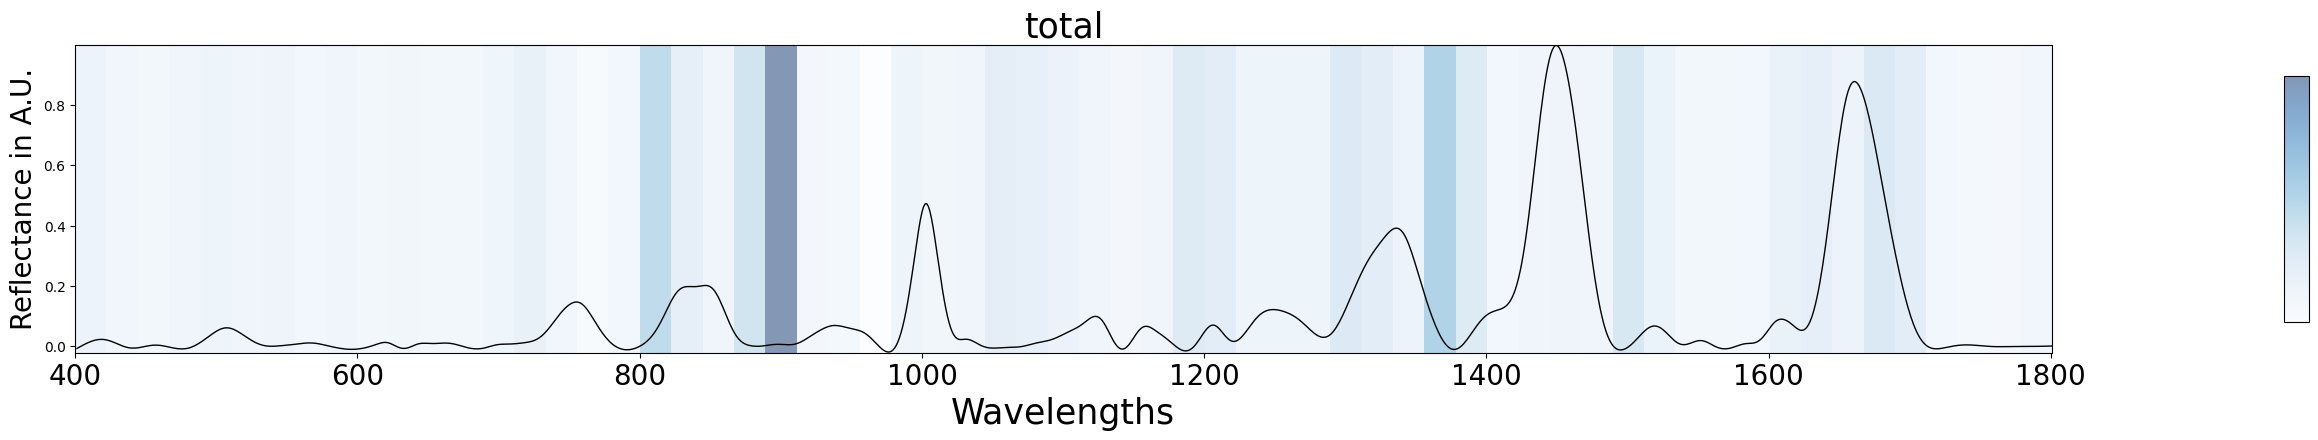

In [ ]:
f = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/CNN_heatmaps.csv', index_col = 0)

average_heatmap = f.to_dict(orient = 'list')
wave = X_train.columns
w_names = [float(x) for x in wave]

X_train_vis = train.drop(['y', 'patient'], axis = 1)
y_train_vis = train['y']

i_dict = {}
X_ar = np.array(X_train_vis)
for clas, i in zip(y_train_vis, X_ar):
  if clas in i_dict.keys():
    i_dict[clas].append(i)
  else:
    i_dict[clas] = [i]

average_i = {}
for key, value in i_dict.items():
  average_i[key] = np.mean(i_dict[key], axis=0)

total_i = np.mean(np.array(list(average_i.values())), axis = 0)
average_i['total'] = total_i
bars = range(0, 1480)
y_pos = 1480

def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in average_heatmap.items():
    mapped = [value[x:x+2] for x in range(0, len(value), 2)]
    mapped_mean = [np.mean(x) for x in mapped]
    mapped_mean = np.array(mapped_mean)
    mapped_mean = np.reshape(mapped_mean, (1, 63))
    binned_heatmapdict[key] = mapped_mean

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=2),cmap='Blues', aspect="auto", interpolation='nearest',extent=[400, max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

##Feature Selection CNN

In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/total_CNN_heatmaps.csv', index_col = 0)
m = []

for index, row in h.iterrows():
  m.append(row[0])

<ipython-input-17-f7d3a025b0ee>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.append(row[0])


In [ ]:
#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list
l = []
n = round(X_train.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(X_train.shape[1] - len(l))])

#Create new dataframe
col_list = X_train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

feat_sel = train[sel_list]

X_train_sel = feat_sel
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test



X_train_95 = X_train_sel
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_CNN_80.csv')


X_test_95 = X_test_sel
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_CNN_80.csv')

<ipython-input-18-fb48abf90afd>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-18-fb48abf90afd>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(X_train.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(X_train.shape[1] - len(l))])

#Create new dataframe
col_list = X_train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

feat_sel = train[sel_list]

X_train_sel = feat_sel
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test


X_train_95 = X_train_sel
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_CNN_85.csv')


X_test_95 = X_test_sel
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_CNN_85.csv')

<ipython-input-20-739f8084ddb8>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-20-739f8084ddb8>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_data_Italian.csv')

#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(X_train.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(X_train.shape[1] - len(l))])

#Create new dataframe
col_list = X_train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

feat_sel = train[sel_list]

X_train_sel = feat_sel
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test


X_train_95 = X_train_sel
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_CNN_90.csv')


X_test_95 = X_test_sel
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_CNN_90.csv')

<ipython-input-21-b159b2b2b7e1>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-21-b159b2b2b7e1>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
h = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/total_CNN_heatmaps.csv', index_col = 0)
m = []

for index, row in h.iterrows():
  m.append(row[0])


#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(X_train.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(X_train.shape[1] - len(l))])

#Create new dataframe
col_list = X_train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

feat_sel = train[sel_list]

X_train_sel = feat_sel
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test

X_train_95 = X_train_sel
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_CNN_95.csv')


X_test_95 = X_test_sel
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_CNN_95.csv')

<ipython-input-22-b198121873be>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m.append(row[0])
<ipython-input-22-b198121873be>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-22-b198121873be>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = round(X_train.shape[1] / len(m))
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(X_train.shape[1] - len(l))])

#Create new dataframe
col_list = X_train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

feat_sel = train[sel_list]

X_train_sel = feat_sel
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test


X_train_95 = X_train_sel
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_CNN_99.csv')


X_test_95 = X_test_sel
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_CNN_99.csv')

<ipython-input-23-9e5b04144285>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-23-9e5b04144285>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


#Transformer

##Implementing Transformer

In [ ]:
#Transformer
#Loading Data
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


def one_hot_encoding(y, n_class):
  y_list = []

  for item in y:
    zer = np.zeros(n_class)
    zer[item] = 1
    y_list.append(zer)

  return np.array(y_list)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

X_train = np.array(X_train)
X_train_3D = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_test = np.array(X_test)
X_test_3D = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
class ViTEmbeddings(tf.keras.layers.Layer):
    def __init__(self, patch_size, hidden_size, dropout=0.0, **kwargs):
        super().__init__(**kwargs)

        self.patch_size = patch_size
        self.hidden_size = hidden_size

        self.patch_embeddings = tf.keras.layers.Conv1D(filters=hidden_size, kernel_size=patch_size, strides=patch_size)
        self.dropout = tf.keras.layers.Dropout(rate=dropout)

    def build(self, input_shape):
        self.cls_token = self.add_weight(shape=(1, 1, self.hidden_size), trainable=True, name="cls_token")

        num_patches = input_shape[1] // self.patch_size
        self.position_embeddings = self.add_weight(
            shape=(1, num_patches + 1, self.hidden_size), trainable=True, name="position_embeddings"
        )

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        inputs_shape = tf.shape(inputs)  # N,H,W,C
        embeddings = self.patch_embeddings(inputs, training=training)

        # add the [CLS] token to the embedded patch tokens
        cls_tokens = tf.repeat(self.cls_token, repeats=inputs_shape[0], axis=0)
        embeddings = tf.concat((cls_tokens, embeddings), axis=1)

        # add positional encoding to each token
        embeddings = embeddings + self.position_embeddings
        embeddings = self.dropout(embeddings, training=training)

        return embeddings
#Next is the MLP; nothing special here. It is the same as in the vit paper.

class MLP(tf.keras.layers.Layer):
    def __init__(self, mlp_dim, out_dim=None, activation="gelu", dropout=0.0, **kwargs):
        super().__init__(**kwargs)
        self.mlp_dim = mlp_dim
        self.out_dim = out_dim
        self.activation = activation
        self.dropout_rate = dropout

    def build(self, input_shape):
        self.dense1 = tf.keras.layers.Dense(self.mlp_dim)
        self.activation1 = tf.keras.layers.Activation(self.activation)
        self.dropout = tf.keras.layers.Dropout(self.dropout_rate)
        self.dense2 = tf.keras.layers.Dense(input_shape[-1] if self.out_dim is None else self.out_dim)

    def call(self, inputs: tf.Tensor, training: bool = False):
        x = self.dense1(inputs)
        x = self.activation1(x)
        x = self.dropout(x, training=training)
        x = self.dense2(x)
        x = self.dropout(x, training=training)
        return x

class Block(tf.keras.layers.Layer):
    def __init__(
        self,
        num_heads,
        attention_dim,
        attention_bias,
        mlp_dim,
        attention_dropout=0.0,
        sd_survival_probability=1.0,
        activation="gelu",
        dropout=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.norm_before = tf.keras.layers.LayerNormalization()
        self.attn = tf.keras.layers.MultiHeadAttention(
            num_heads,
            attention_dim // num_heads,
            use_bias=attention_bias,
            dropout=attention_dropout,
        )
        self.stochastic_depth = tfa.layers.StochasticDepth(sd_survival_probability)
        self.norm_after = tf.keras.layers.LayerNormalization()
        self.mlp = MLP(mlp_dim=mlp_dim, activation=activation, dropout=dropout)

    def build(self, input_shape):
        super().build(input_shape)
        # TODO YONIGO: tf doc says to do this  ¯\_(ツ)_/¯
        self.attn._build_from_signature(input_shape, input_shape)

    def call(self, inputs, training=False):
        x = self.norm_before(inputs, training=training)
        x = self.attn(x, x, training=training)
        x = self.stochastic_depth([inputs, x], training=training)
        x2 = self.norm_after(x, training=training)
        x2 = self.mlp(x2, training=training)
        return self.stochastic_depth([x, x2], training=training)

    def get_attention_scores(self, inputs):
        x = self.norm_before(inputs, training=False)
        _, weights = self.attn(x, x, training=False, return_attention_scores=True)
        return weights


class VisionTransformer(tf.keras.Model):
    def __init__(
        self,
        patch_size,
        hidden_size,
        depth,
        num_heads,
        mlp_dim,
        num_classes,
        dropout=0.1,
        sd_survival_probability=1.0,
        attention_bias=False,
        attention_dropout=0.0,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.embeddings = ViTEmbeddings(patch_size, hidden_size, dropout)
        sd = tf.linspace(1.0, sd_survival_probability, depth)
        self.blocks = [
            Block(
                num_heads,
                attention_dim=hidden_size,
                attention_bias=attention_bias,
                attention_dropout=attention_dropout,
                mlp_dim=mlp_dim,
                sd_survival_probability=(sd[i].numpy().item()),
                dropout=dropout,
            )
            for i in range(depth)
        ]

        self.norm = tf.keras.layers.LayerNormalization()

        self.head = tf.keras.layers.Dense(num_classes, activation = 'softmax')

    def call(self, inputs: tf.Tensor, training: bool = False) -> tf.Tensor:
        x = self.embeddings(inputs, training=training)
        for block in self.blocks:
            x = block(x, training=training)
        x = self.norm(x)
        x = x[:, 0]  # take only cls_token
        return self.head(x)

    def get_last_selfattention(self, inputs: tf.Tensor):
        x = self.embeddings(inputs, training=False)
        for block in self.blocks[:-1]:
            x = block(x, training=False)
        return self.blocks[-1].get_attention_scores(x)


import matplotlib.pyplot as plt
import numpy as np

lead_index = ['Class']


def plot_12(ecg, sampling_rate, plot_grid=True):
    "This function is ridiculously slow and there are mutch better ways to implemt"
    figsize = (25, 1.5 * 10)

    height_ratios = [ecg[:, i].max() - ecg[:, i].min() for i in range(12)]
    height_ratios = [i / height_ratios[0] for i in height_ratios]
    fig, axs = plt.subplots(12, 1, figsize=figsize, gridspec_kw={"height_ratios": height_ratios})
    fig.subplots_adjust(hspace=0.0)
    for i, ax in enumerate(axs):
        plot_ax(ax, ecg[:, i], sampling_rate, plot_grid=plot_grid)
        ax.set_ylabel(lead_index[i], fontsize=13)

    return fig, axs


def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

Epoch 1/1000
9/9 [==============================] - 9s 265ms/step - loss: 0.8540 - accuracy: 0.0000e+00 - val_loss: 0.7284 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 2s 276ms/step - loss: 0.8102 - accuracy: 0.0000e+00 - val_loss: 0.7034 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 3s 335ms/step - loss: 0.7633 - accuracy: 0.0000e+00 - val_loss: 0.6987 - val_accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 3s 332ms/step - loss: 0.8066 - accuracy: 0.0000e+00 - val_loss: 0.7015 - val_accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 2s 255ms/step - loss: 0.8010 - accuracy: 0.0000e+00 - val_loss: 0.7161 - val_accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 2s 274ms/step - loss: 0.7597 - accuracy: 0.0000e+00 - val_loss: 0.6952 - val_accuracy: 0.0000e+00
Epoch 7/1000
9/9 [==============================] - 1s 158ms/step - loss: 0.7488 - accuracy: 0.0000e

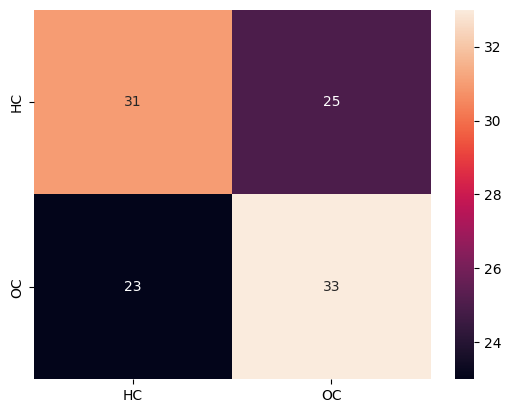

In [ ]:
#Best Model so far
vit1 = VisionTransformer(
        patch_size=15,
        hidden_size=64,
        depth=3,
        num_heads=3,
        mlp_dim=64,
        num_classes=2,
        sd_survival_probability=1.0,
    )

optimizer = tf.keras.optimizers.Adam(0.0001, use_ema = True, ema_momentum = 0.99)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = [tf.keras.metrics.Accuracy()]
vit1.compile(optimizer=optimizer, loss=loss, metrics=metrics)


es = EarlyStopping(monitor= 'val_loss', mode='min', verbose=1, patience = 50)

history_transformer = vit1.fit(X_train_3D, y_train, validation_data = (X_test_3D, y_test), epochs=1000, callbacks = [es])

from sklearn.metrics import confusion_matrix
y_pred = vit1.predict(X_test_3D)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), np.rint(y_pred.argmax(axis=1)))
DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
plt.show()

In [ ]:
pred = vit1.predict(X_test_3D)
preds_conv = []
for item in pred:
  max_ind = list(item).index(max(item))
  zer = np.zeros(2)
  zer[max_ind] = 1
  preds_conv.append(zer)
print(accuracy_score(y_test, preds_conv))
print(loss(y_test, preds_conv))
print(classification_report(y_test, preds_conv))

4/4 [==============================] - 0s 37ms/step
0.5714285714285714
tf.Tensor(6.907755336124999, shape=(), dtype=float64)
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        56
           1       0.57      0.59      0.58        56

   micro avg       0.57      0.57      0.57       112
   macro avg       0.57      0.57      0.57       112
weighted avg       0.57      0.57      0.57       112
 samples avg       0.57      0.57      0.57       112



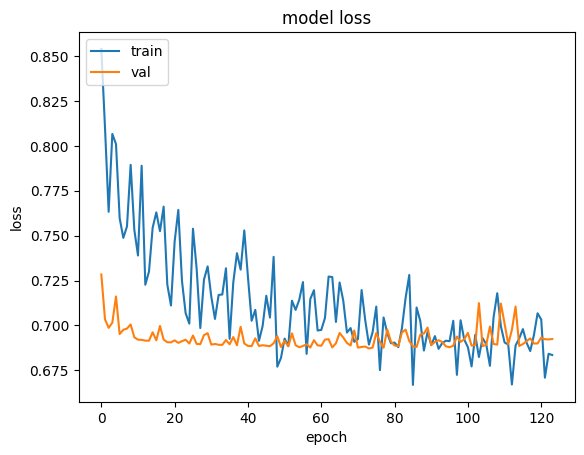

In [ ]:
plt.plot(history_transformer.history['loss'])
plt.plot(history_transformer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Create Visualizations Transformer

In [ ]:
def array_to_label(y):
  array_to_value = [y.tolist().index(1)]
  value_to_label = le.inverse_transform(np.array(array_to_value))
  return value_to_label[0]

fusion_method = 'max'
aggregated_dict = {}
aggregated_record = {}
for record, label in zip(X_train_3D, y_train):
  attn = vit1.get_last_selfattention(tf.expand_dims(record, 0))
  attn = attn[0, :, 0, 1:]  # cls_token attention with rest
  attn = tf.transpose(attn, (1, 0))
  attn = tf.expand_dims(tf.expand_dims(attn, 0), 0)
  attn = tf.image.resize(attn, (1, 63))[0, 0]

  #Fusing attention
  if fusion_method == "mean":
      attention_heads_fused = np.array(attn).mean(axis=1)
  elif fusion_method == "max":
      attention_heads_fused = np.array(attn).max(axis=1)
  elif fusion_method == "min":
      attention_heads_fused = np.array(attn).min(axis=1)

  true_class = array_to_label(label)
  if true_class in aggregated_dict.keys():
    aggregated_dict[true_class].append(attention_heads_fused)
  else:
    aggregated_dict[true_class] = [attention_heads_fused]

  if true_class in aggregated_record.keys():
    aggregated_record[true_class].append(record)
  else:
    aggregated_record[true_class] = [record]

In [ ]:
average_heatmap = {}
average_record = {}

for key, value in aggregated_dict.items():
  av = np.mean(aggregated_dict[key], axis = 0)
  average_heatmap[key] = av

for key, value in aggregated_record.items():
  av = np.mean(aggregated_record[key], axis = 0)
  average_record[key] = av

scaler = preprocessing.MinMaxScaler((-1, 1))
average_heatmap =  pd.DataFrame(scaler.fit_transform(pd.DataFrame(average_heatmap)), columns = ['HC', 'OC']).to_dict('list')

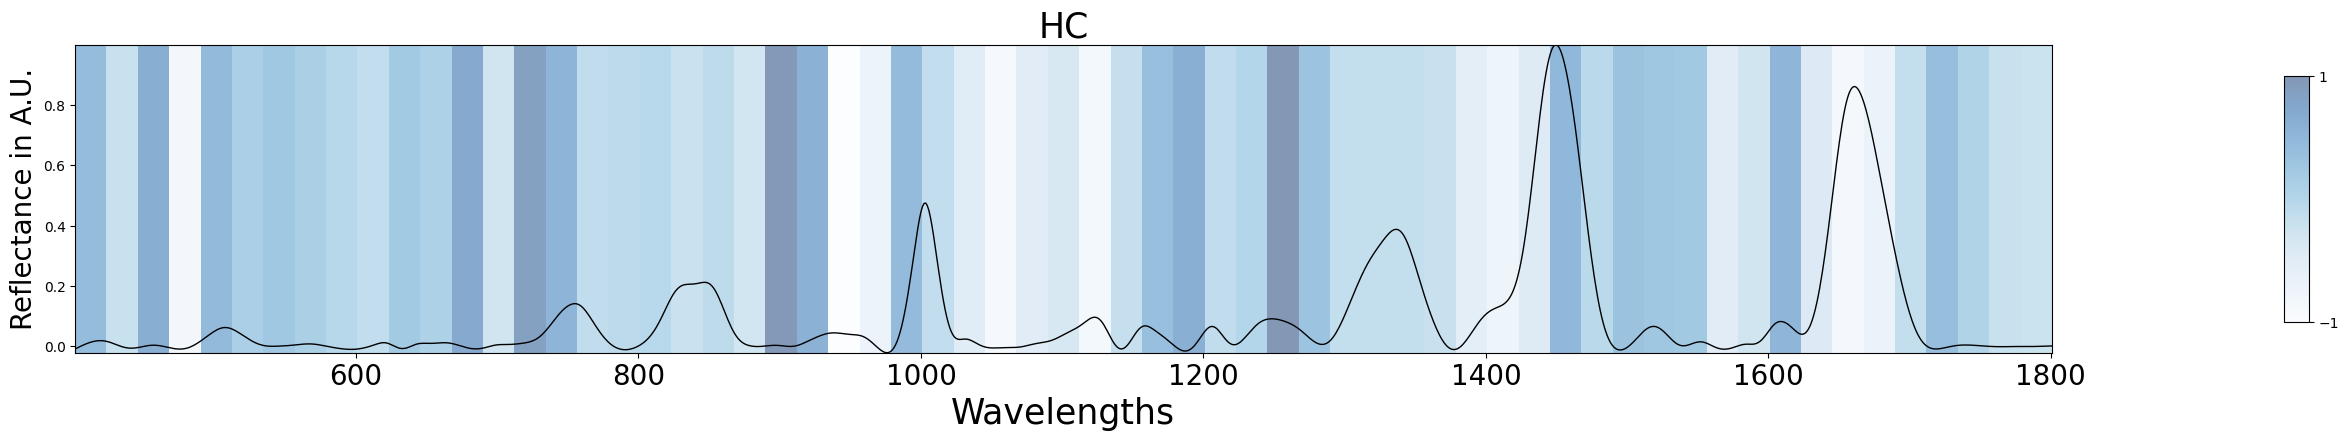

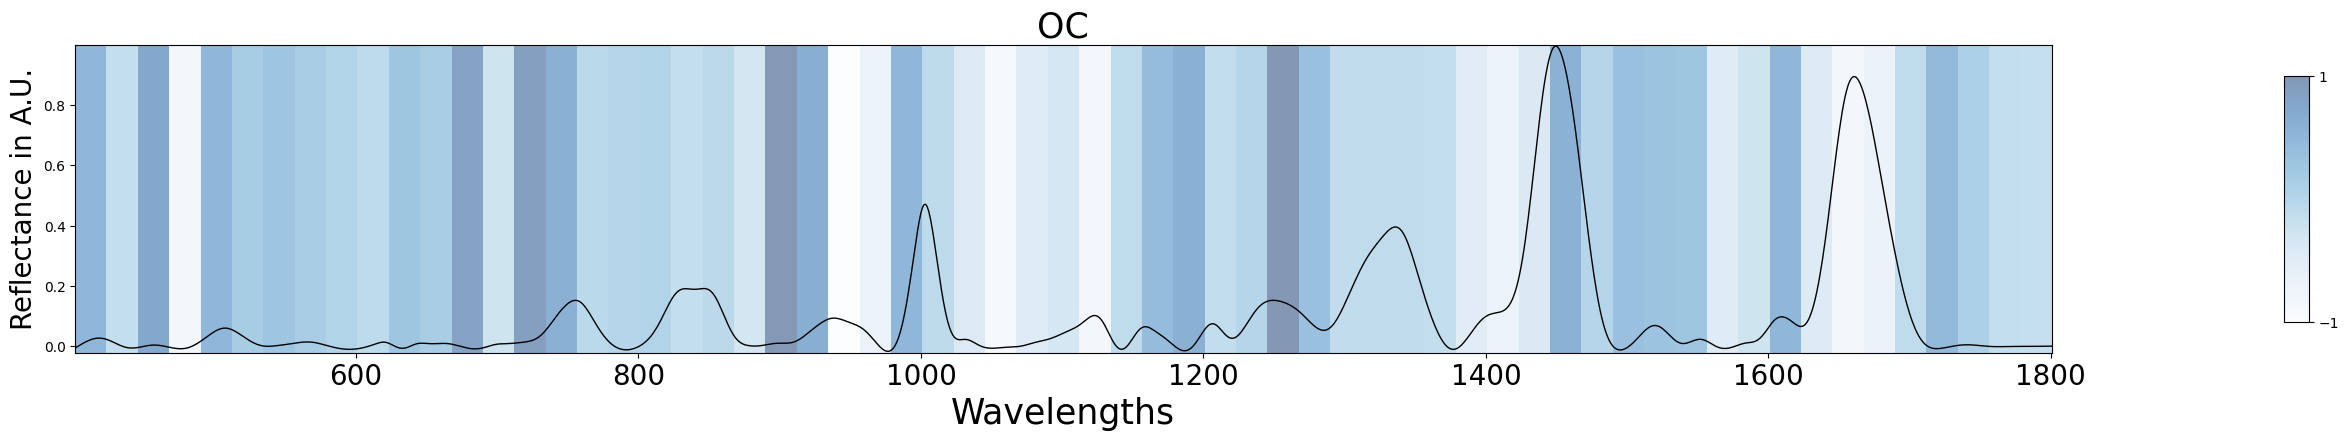

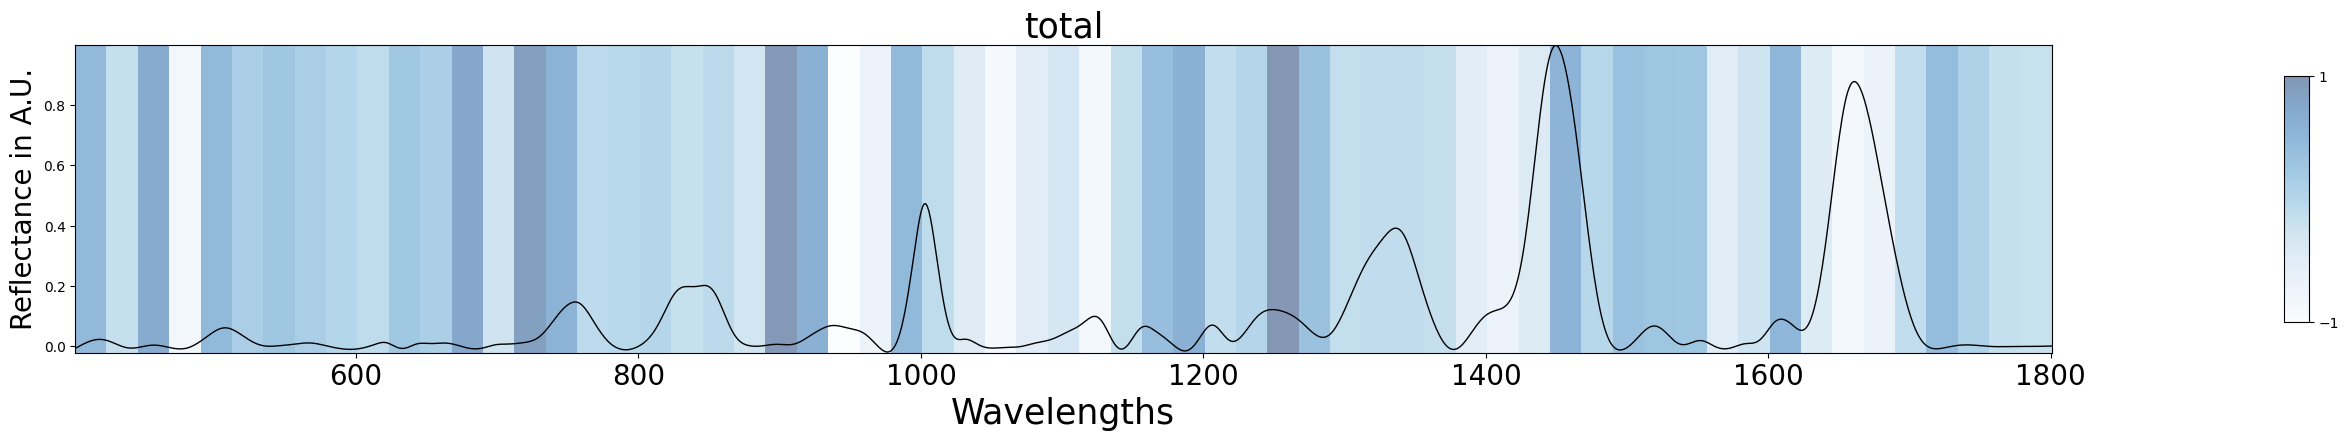

In [ ]:
def plot_ax(ax, signal, sampling_rate, plot_grid=True):
    color_line = (0, 0, 0.7)
    color_major = (1, 0, 0)
    color_minor = (1, 0.7, 0.7)

    ax.plot(np.arange(0, len(signal)), signal, linewidth=0.5, color=color_line)

    if plot_grid:
        # set major grid
        xmajor = np.arange(0, len(signal), sampling_rate * 0.2)
        ymajor = np.arange(signal.min(), signal.max(), 0.5)
        ax.set_xticks(xmajor, minor=False)
        ax.set_xticks(xmajor, minor=False)
        ax.set_yticks(ymajor, minor=False)
        ax.grid(which="major", color=color_major, linewidth=0.5)

        # set minor grid
        xminor = np.arange(0, len(signal), sampling_rate * 0.04)
        yminor = np.arange(signal.min(), signal.max(), 0.1)
        ax.set_xticks(xminor, minor=True)
        ax.set_yticks(yminor, minor=True)
        ax.grid(which="minor", color=color_minor, linewidth=0.5)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.margins(0)

    ax.set_ylim(signal.min(), signal.max())

total_av = np.mean(list(average_heatmap.values()), axis=0)
average_heatmap['total'] = total_av

total_i = np.mean(np.array(list(average_record.values())), axis = 0)
average_record['total'] = total_i

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

#Set lower and upper bounds for gradient intensity

for key, value in zip(average_heatmap.keys(), average_heatmap.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

#Need to save average heatmap here
import pandas as pd
df = pd.DataFrame(average_heatmap)
df.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Average_Heatmap_transformer.csv')

##Feature Selection Transformer

In [ ]:
average_heatmap1 = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/Average_Heatmap_transformer.csv', index_col = 0)

In [ ]:
#Feature Selection
m = [x for x in average_heatmap1['total']]

#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 30
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train.shape[1] - len(l))])

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train_sel = X_train[sel_list]
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test



X_train_95 = X_train[sel_list]
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_Transformer_80.csv')


X_test_95 = X_test[sel_list]
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_Transformer_80.csv')

<ipython-input-34-11e0fdbbf9d4>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-34-11e0fdbbf9d4>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
#Feature Selection
m = [x for x in average_heatmap1['total']]

#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 28
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train.shape[1] - len(l))])

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train_sel = X_train[sel_list]
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test



X_train_95 = X_train[sel_list]
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_Transformer_85.csv')


X_test_95 = X_test[sel_list]
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_Transformer_85.csv')

<ipython-input-35-474f8aa4bc0c>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-35-474f8aa4bc0c>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
#Feature Selection
m = [x for x in average_heatmap1['total']]

#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 28
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train.shape[1] - len(l))])

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train_sel = X_train[sel_list]
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test



X_train_95 = X_train[sel_list]
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_Transformer_90.csv')


X_test_95 = X_test[sel_list]
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_Transformer_90.csv')

<ipython-input-36-4e311bfee76b>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-36-4e311bfee76b>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
#Feature Selection
m = [x for x in average_heatmap1['total']]

#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list
l = []
n = 25
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train.shape[1] - len(l))])

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue


train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train_sel = X_train[sel_list]
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test


X_train_95 = X_train[sel_list]
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_Transformer_95.csv')


X_test_95 = X_test[sel_list]
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_Transformer_95.csv')

<ipython-input-37-79723e3b5c1a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-37-79723e3b5c1a>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

#Feature Selection
m = [x for x in average_heatmap1['total']]

#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x > per else 0 for x in m])
final_values

#Create appropriate list -> 5 under approach
l = []
n = 15
for value in final_values:
  for i in range(n):
    l.append(value)

l.extend([0 for x in range(train.shape[1] - len(l))])

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, l):
  if value != 0:
    sel_list.append(column)
  else:
    continue

train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = one_hot_encoding(y_train, 2)
y_test = one_hot_encoding(y_test, 2)

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train_sel = X_train[sel_list]
y_train_sel = y_train
X_test_sel = X_test[sel_list]
y_test_sel = y_test



X_train_95 = X_train[sel_list]
X_train_95['y'] = train['y']

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_Transformer_99.csv')


X_test_95 = X_test[sel_list]
X_test_95['y'] = test['y']

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_Transformer_99.csv')

<ipython-input-38-4b6a2c7f6f37>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = train['y']
<ipython-input-38-4b6a2c7f6f37>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = test['y']


#Random Forest

##Implement Random Forrest

In [ ]:
#Random Forest

train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


tree1 = RandomForestClassifier(
    n_estimators=500,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')

tree1.fit(X_train, y_train)
pred = tree1.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

print(classification_report(y_test, pred))

0.8035714285714286
              precision    recall  f1-score   support

          HC       0.81      0.79      0.80        56
          OC       0.79      0.82      0.81        56

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112



validation_accuracy: 0.804


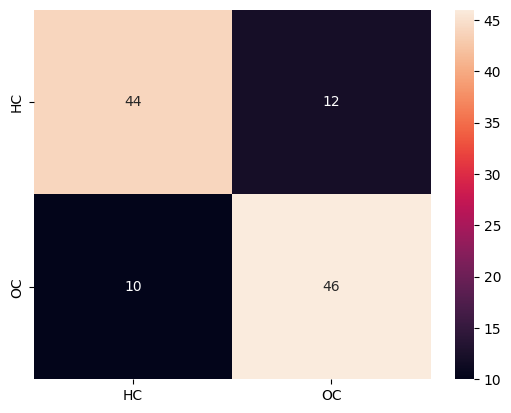

In [ ]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
plt.show()

##Create Visualizations Random Forest

In [ ]:
#Transparency RF
classes = tree1.classes_
coefficients = tree1.feature_importances_

def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, y_train, coefficients)

coef_df = pd.DataFrame(result)
coef_df.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Random_Forrest_Coefficients.csv')

In [ ]:
heatmap_dict = {}
for key, value in result.items():
  val_list = []
  for key1, value1 in value.items():
    val_list.append(value1)
  heatmap_dict[key] = val_list

In [ ]:
#Feature Selection
cof = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/Random_Forrest_Coefficients.csv', index_col = 0)

train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_val = test.drop(['y', 'patient'], axis = 1)
y_val = test['y']



X_train_l = []
for index, row in X_train.iterrows():
    X_train_l.append([x for x in row])

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in heatmap_dict.items():
    mapped = [value[x:x+32] for x in range(0, len(value), 32)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

record_dict = {}
for record, label in zip(X_train_l, y_train):
  if label in record_dict.keys():
    record_dict[label].append(record)
  else:
    record_dict[label] = [record]

agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)


#Create 48 bins for heatmap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

#Record dict is recorded signals
record_dict = {}
l = []
for r, label in zip(X_train_l, y_train):
  l.append(r)
  if label in record_dict.keys():
    record_dict[label].append(r)
  else:
    record_dict[label] = [r]

#Creating mean signal per class
agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)

#Add average record here
tot = np.mean(l, axis = 0)
agg_rec['total'] = tot

#Calculate average heatmap
hea = []
for key, value in heatmap_dict.items():
  hea.append(value)
tot_heat = np.mean(hea, axis = 0)
heatmap_dict['total'] = tot_heat

binned_heatmapdict = {}
for key, value in heatmap_dict.items():
    mapped = [value[x:x+22] for x in range(0, len(value), 22)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

In [ ]:
len(mapped)

61

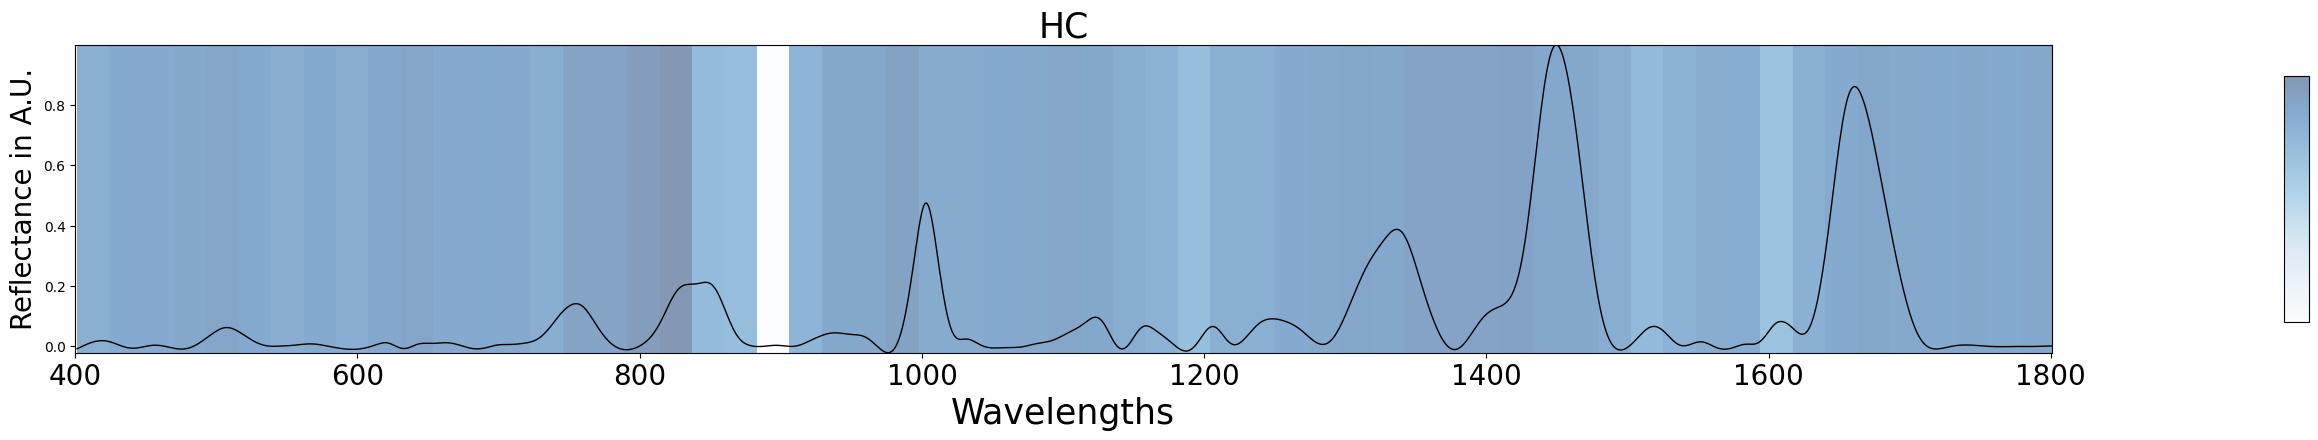

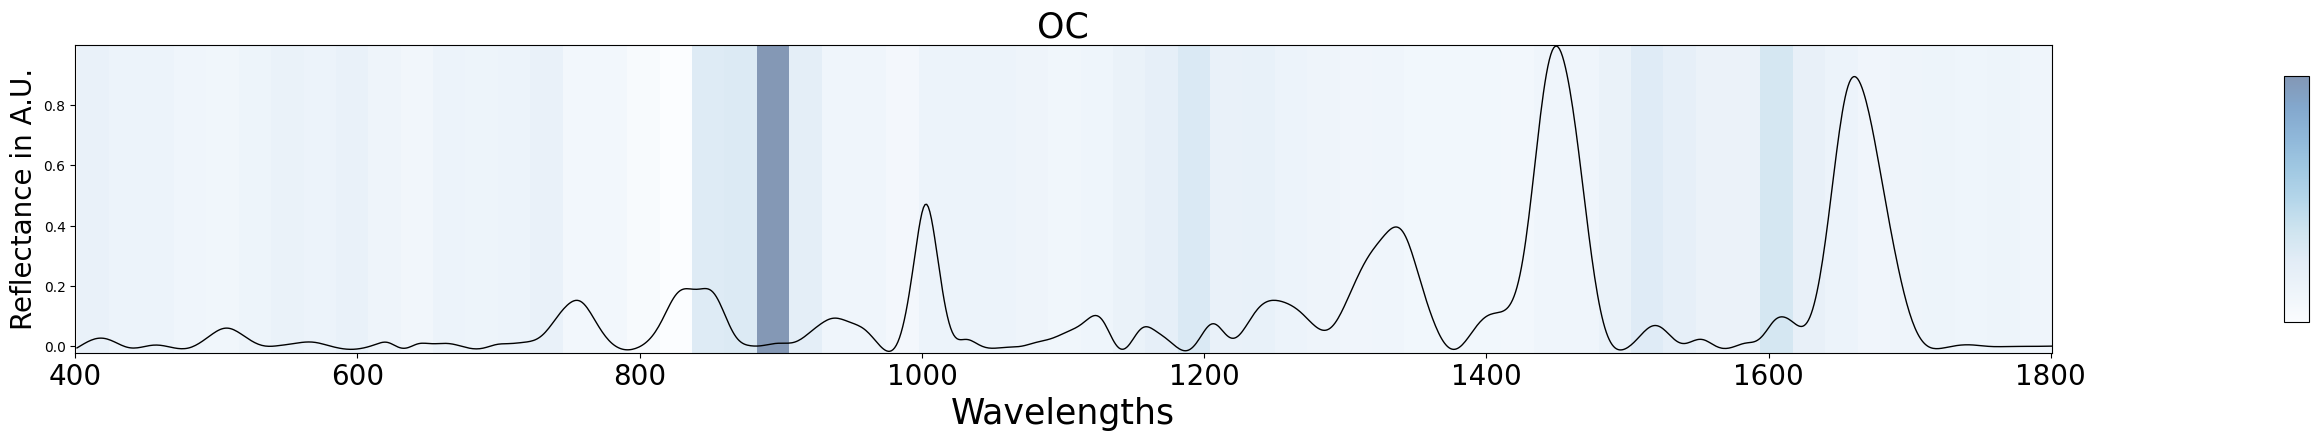

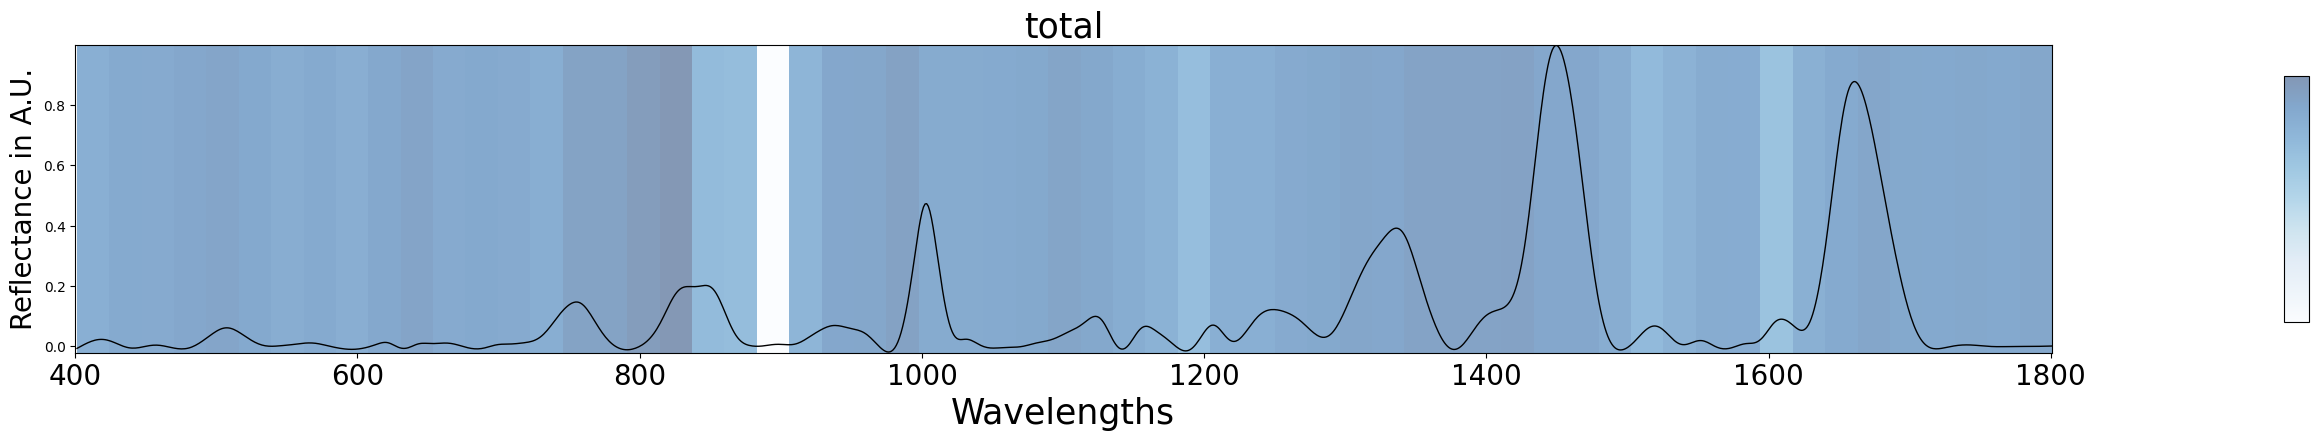

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv')
binned_heatmapdict = {}
for key, value in heatmap_dict.items():
    mapped = [value[x:x+21] for x in range(0, len(value), 21)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

wave = df.columns[:-2]

#Setting lower and upper bounds for signal intensity
cmax = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = max(f)
  if i > cmax:
    cmax = i
  else:
    continue

cmin = 0
for key, value in average_i.items():
  f = [x for x in value]
  i = min(f)
  if i < cmin:
    cmin = i
  else:
    continue

wave = train.drop(['y', 'patient'], axis = 1).columns
w_names = [float(x) for x in wave]

#Set lower and upper bounds for gradient intensity

for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[min(w_names), max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.xlim([400, max(w_names)])
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

##Feature Selection Random Forest

In [ ]:
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

feat_sel = train[sel_list]

X_train = feat_sel
y_train = train['y']
X_test = test[sel_list]
y_test = test['y']



#Model Implementation and Tuning for reduced feature space - 80

tree80 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree80.fit(X_train, y_train)
pred = tree80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_RF_80.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_RF_80.csv')

0.625


<ipython-input-59-ae7076c242df>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train
<ipython-input-59-ae7076c242df>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = y_test


In [ ]:
#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

feat_sel = train[sel_list]

X_train = feat_sel
y_train = train['y']
X_test = test[sel_list]
y_test = test['y']

#Model Implementation and Tuning for reduced feature space - 80

tree80 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree80.fit(X_train, y_train)
pred = tree80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_RF_85.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_RF_85.csv')

0.6785714285714286


<ipython-input-60-0e4dd636aa09>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train
<ipython-input-60-0e4dd636aa09>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = y_test


In [ ]:
#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

feat_sel = train[sel_list]

X_train = feat_sel
y_train = train['y']
X_test = test[sel_list]
y_test = test['y']


#Model Implementation and Tuning for reduced feature space - 80

tree80 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')

tree80.fit(X_train, y_train)
pred = tree80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_RF_90.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_RF_90.csv')

0.6517857142857143


<ipython-input-61-e88a723027ad>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train
<ipython-input-61-e88a723027ad>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = y_test


In [ ]:
#Running RF on RF Wavelengths - 80
#df = pd.read_csv('/content/drive/MyDrive/Ovarian/Training_data_Italian.csv', index_col = 0)

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

feat_sel = train[sel_list]

X_train = feat_sel
y_train = train['y']
X_test = test[sel_list]
y_test = test['y']

#Model Implementation and Tuning for reduced feature space - 80

tree80 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree80.fit(X_train, y_train)
pred = tree80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_RF_95.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_RF_95.csv')

0.6160714285714286


<ipython-input-62-7afb9f149a95>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train
<ipython-input-62-7afb9f149a95>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = y_test


In [ ]:
#Running RF on RF Wavelengths - 80
#df = pd.read_csv('/content/drive/MyDrive/Ovarian/Training_data_Italian.csv', index_col = 0)

#Feature Selection
m = [x for x in heatmap_dict['total'] if not pd.isna(x)]

#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

feat_sel = train[sel_list]

X_train = feat_sel
y_train = train['y']
X_test = test[sel_list]
y_test = test['y']

#Model Implementation and Tuning for reduced feature space - 80

tree80 = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced_subsample')


tree80.fit(X_train, y_train)
pred = tree80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_RF_99.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_RF_99.csv')

0.5714285714285714


<ipython-input-63-cfbe2d580204>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train
<ipython-input-63-cfbe2d580204>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_95['y'] = y_test


#LDA

##Implpement LDA

0.8392857142857143
validation_accuracy: 0.839


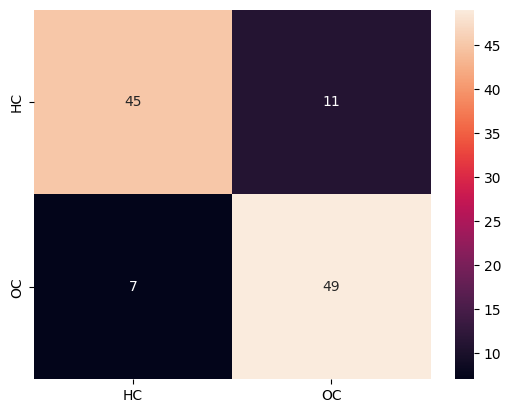

              precision    recall  f1-score   support

          HC       0.87      0.80      0.83        56
          OC       0.82      0.88      0.84        56

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



In [ ]:
#LDA
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


LDA = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA.fit(X_train, y_train)
pred = LDA.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
print('validation_accuracy: %.3f' % (acc))

DetaFrame_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
snNew.heatmap(DetaFrame_cm, annot=True, yticklabels=['HC', 'OC'], xticklabels=['HC', 'OC'])
plt.show()

print(classification_report(y_test, pred))

##Create Visualizations LDA

In [ ]:
classes = LDA.classes_
coefficients = LDA.coef_

def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(M), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, y_train, coefficients)

coef_df = pd.DataFrame(result)
coef_df.to_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv')

##Figure out coefficients meaning

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Retrieve the coefficients
coefficients = LDA.coef_

# Display the coefficients
print("Feature importances (coefficients) for the discriminant function:")
print(coefficients)

# Retrieve the class means
class_means = LDA.means_
print("Class means:")
print(class_means)

# Compute the discriminant function values for each class mean
discriminant_class_0 = np.dot(class_means[0], coefficients.T)
discriminant_class_1 = np.dot(class_means[1], coefficients.T)

print("Discriminant function value for class 0 mean:", discriminant_class_0)
print("Discriminant function value for class 1 mean:", discriminant_class_1)

# Interpret the results
if discriminant_class_1 > discriminant_class_0:
    print("Positive coefficients indicate a higher likelihood of belonging to class 1.")
    print("Negative coefficients indicate a higher likelihood of belonging to class 0.")
else:
    print("Positive coefficients indicate a higher likelihood of belonging to class 0.")
    print("Negative coefficients indicate a higher likelihood of belonging to class 1.")


Feature importances (coefficients) for the discriminant function:
[[-7.9361047  -6.03164232 -3.9430178  ...  9.35552281 12.77941662
  15.09765525]]
Class means:
[[-0.00841978 -0.00554871 -0.0026908  ...  0.00093988  0.00109415
   0.00124637]
 [-0.00524671 -0.00166675  0.00189169 ...  0.00052964  0.00056837
   0.00060671]]
Discriminant function value for class 0 mean: [-25.46132576]
Discriminant function value for class 1 mean: [-16.34856361]
Positive coefficients indicate a higher likelihood of belonging to class 1.
Negative coefficients indicate a higher likelihood of belonging to class 0.


In [ ]:
h = X_train
h['y'] = y_train
health = h.loc[h['y'] == 'HC']
health['401.226563'].mean()

#Negative coefficients = health
#Positive coefficients = cancer

-0.008419781403732318

##Continue

In [ ]:
coefficients = LDA.coef_
feature_importance_cancer = list(coefficients[0])
feature_importance_health = list(-coefficients[0])

c = {'HC' : feature_importance_health, 'OC' : feature_importance_cancer}

In [ ]:
#Get order of classes
coef_df = pd.DataFrame(c)

coef_df
coef_df.to_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv', index_col = 0)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']

In [ ]:
X_train_l = []
for index, row in X_train.iterrows():
    X_train_l.append([x for x in row])

#Record per class
clas = df.columns
rec = [list(coef_df['HC'].values), list(coef_df['OC'].values)]

heatmap_dict = {}
for a, b in zip(clas, rec):
    heatmap_dict[a] = b


scaler = preprocessing.MinMaxScaler((-1, 1))
heatmap_dict =  pd.DataFrame(scaler.fit_transform(pd.DataFrame(heatmap_dict)), index = X_test.columns, columns = ['HC', 'OC']).to_dict('list')

binned_heatmapdict = {}
#Create 48 bins for heatmap
for key, value in heatmap_dict.items():
    mapped = [value[x:x+32] for x in range(0, len(value), 32)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean

record_dict = {}
for record, label in zip(X_train_l, y_train):
  if label in record_dict.keys():
    record_dict[label].append(record)
  else:
    record_dict[label] = [record]

agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)

In [ ]:
#Create 48 bins for heatmap

#Record dict is recorded signals
record_dict = {}
l = []
for r, label in zip(X_train_l, y_train):
  l.append(r)
  if label in record_dict.keys():
    record_dict[label].append(r)
  else:
    record_dict[label] = [r]

#Creating mean signal per class
agg_rec = {}
for key, value in record_dict.items():
    agg_rec[key] = np.mean(value, axis = 0)


binned_heatmapdict = {}
for key, value in heatmap_dict.items():
    mapped = [value[x:x+21] for x in range(0, len(value), 21)]
    mapped_mean = [np.mean(x) for x in mapped]
    binned_heatmapdict[key] = mapped_mean



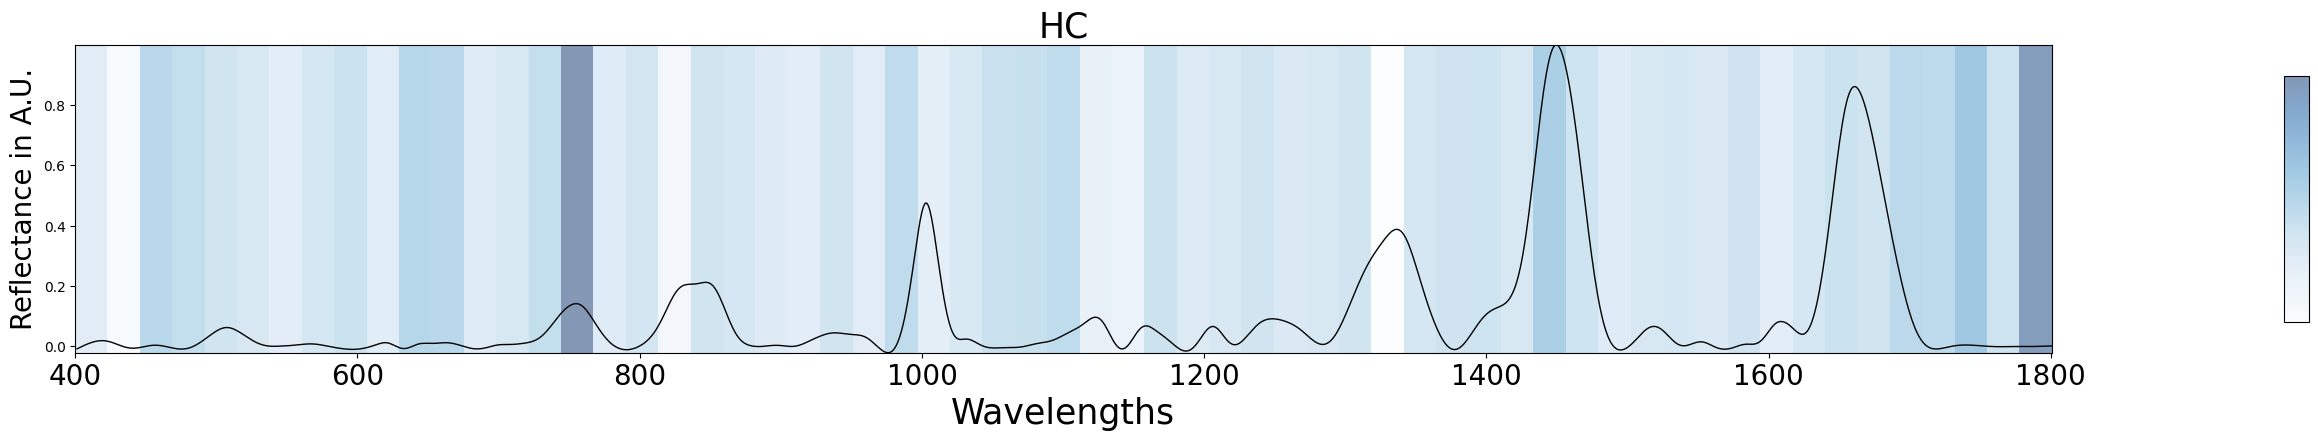

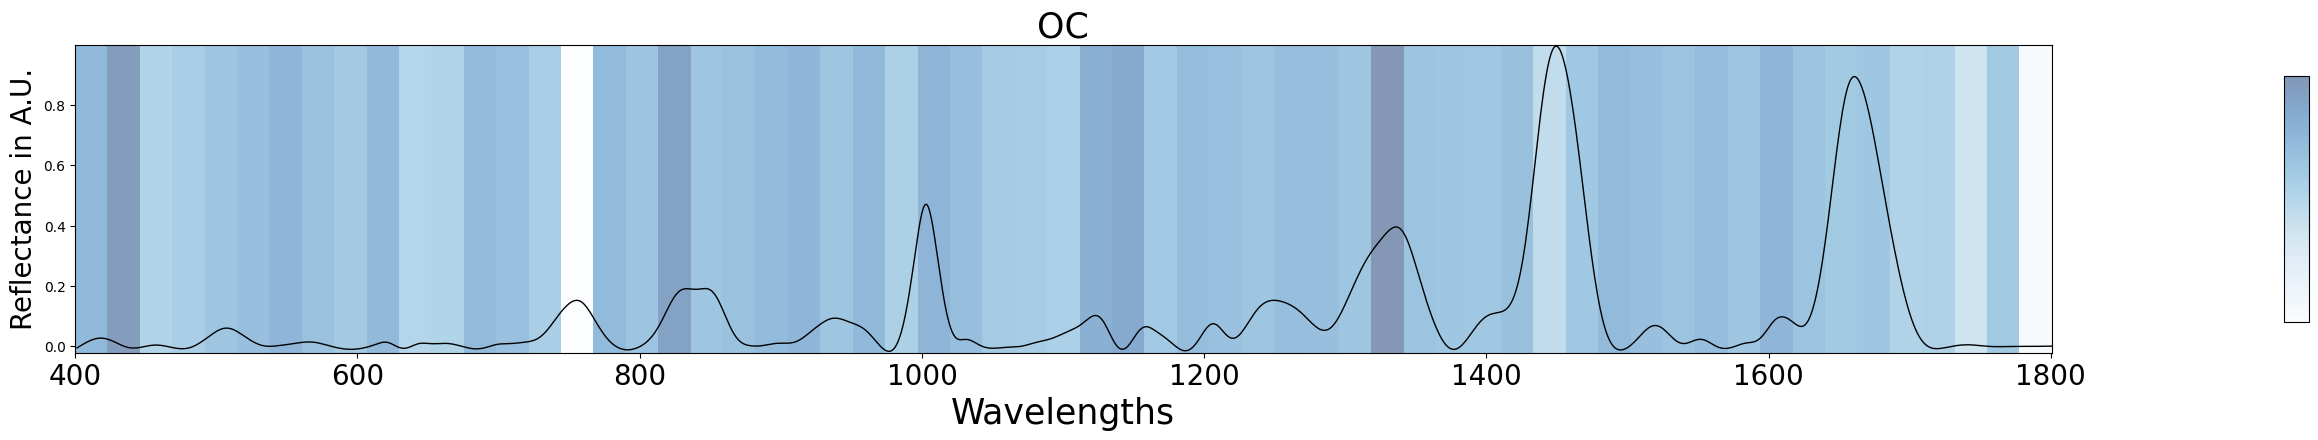

In [ ]:
wave = X_train.columns
w_names = [float(x) for x in wave]


#Gettiing Average Heatmaps
wave = df.columns
for key, value in zip(binned_heatmapdict.keys(), binned_heatmapdict.values()):
  plt.figure(figsize=(30,4))
  c = plt.imshow(np.expand_dims(value,axis=0),cmap='Blues', aspect="auto", interpolation='nearest',extent=[400, max(w_names), cmin, cmax], alpha=0.5)
  plt.plot(w_names, average_i[key],'k', linewidth = 1)
  plt.xlabel('Wavelengths', fontdict={'fontsize': 25})
  plt.ylabel('Reflectance in A.U.', fontdict={'fontsize': 20})
  plt.tick_params(axis='x', labelsize=20)
  locs, labels = plt.xticks()
  cbar = plt.colorbar(c, orientation='vertical', fraction=0.05, pad=0.1, aspect=10, shrink=0.8, ticks=[-1, 1])
  plt.title(str(key), fontdict={'fontsize': 25})
  plt.show()

##Feature Selection LDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv', index_col = 0)
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


#Feature Selection
m = df['OC'].values

#Retain only features in 80th percentile or above
per = np.percentile(m, 80)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train = train[sel_list]
y_train = train['y']
X_test = X_test[sel_list]
y_test = test['y']


#Model Implementation and Tuning for reduced feature space - 80

LDA80 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA80.fit(X_train, y_train)
pred = LDA80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_LDA_80.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_LDA_80.csv')

0.7232142857142857


<ipython-input-75-a7dcfc41f189>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv', index_col = 0)
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


#Feature Selection
m = df['OC'].values

#Retain only features in 85th percentile or above
per = np.percentile(m, 85)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

X_train = train[sel_list]
y_train = train['y']
X_test = X_test[sel_list]
y_test = test['y']


#Model Implementation and Tuning for reduced feature space - 80

LDA80 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA80.fit(X_train, y_train)
pred = LDA80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_LDA_85.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_LDA_85.csv')

0.7053571428571429


<ipython-input-76-2c37ed21e271>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv', index_col = 0)
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


#Feature Selection
m = df['OC'].values

#Retain only features in 90th percentile or above
per = np.percentile(m, 90)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')

feat_sel = train[sel_list]

X_train = train[sel_list]
y_train = train['y']
X_test = X_test[sel_list]
y_test = test['y']


#Model Implementation and Tuning for reduced feature space - 80

LDA80 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA80.fit(X_train, y_train)
pred = LDA80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_LDA_90.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_LDA_90.csv')

0.6875


<ipython-input-77-4bcce478ccec>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv', index_col = 0)
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


#Feature Selection
m = df['OC'].values

#Retain only features in 95th percentile or above
per = np.percentile(m, 95)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')


X_train = train[sel_list]
y_train = train['y']
X_test = X_test[sel_list]
y_test = test['y']


#Model Implementation and Tuning for reduced feature space - 80

LDA80 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA80.fit(X_train, y_train)
pred = LDA80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_LDA_95.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_LDA_95.csv')

0.7053571428571429


<ipython-input-78-6bb05ed84e76>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/LDA_coefficients.csv', index_col = 0)
train = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/train_ovarian.csv', index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer/test_ovarian.csv', index_col = 0)

X_train = train.drop(['y', 'patient'], axis = 1)
y_train = train['y']

X_test = test.drop(['y', 'patient'], axis = 1)
y_test = test['y']


#Feature Selection
m = df['OC'].values

#Retain only features in 99th percentile or above
per = np.percentile(m, 99)
final_values = np.array([x if x >= per else 0 for x in m])
final_values = np.append(final_values, 1)

#Create new dataframe
col_list = train.columns
sel_list = []
for column, value in zip(col_list, final_values):
  if value != 0:
    sel_list.append(column)
  else:
    continue

if 'patient' in sel_list:
  sel_list.remove('patient')

if 'y' in sel_list:
  sel_list.remove('y')


X_train = train[sel_list]
y_train = train['y']
X_test = X_test[sel_list]
y_test = test['y']


#Model Implementation and Tuning for reduced feature space - 80

LDA80 = LinearDiscriminantAnalysis(
    solver='lsqr',
    shrinkage = 'auto',
    priors = None,
    n_components = None,
    store_covariance = False,
    tol = 0.001,
    covariance_estimator = None,
)


LDA80.fit(X_train, y_train)
pred = LDA80.predict(X_test)
final_accuracy = accuracy_score(y_test, pred)
print(final_accuracy)

X_train_95 = X_train
X_train_95['y'] = y_train

X_train_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Training_LDA_99.csv')


X_test_95 = X_test
X_test_95['y'] = y_test

X_test_95.to_csv('/content/drive/MyDrive/Ovarian_Cancer/Testing_LDA_99.csv')

0.6696428571428571


<ipython-input-79-49b5259cc727>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_95['y'] = y_train
